In [2]:
from pathlib import Path
import pandas as pd

In [3]:
RESULTS_DIR = Path("/home/ole/masterarbeit/flidp/results/run-27.06.2024-10:33:00")

In [6]:
noise_multipliers = {}
dfs = {}
for d in RESULTS_DIR.glob('*'):
    df = pd.read_csv(d / "history.csv")
    df = df.set_index("Round")
    noise_multiplier = df["NoiseMultiplier"].unique().item() if "NoiseMultiplier" in df.columns else 0.0
    noise_multipliers[d.name] = noise_multiplier
    dfs[d.name] = df

In [18]:
dfs['individual-relaxed']['sparse_categorical_accuracy'].max()

0.87646943

In [7]:
noise_multipliers

{'individual-relaxed': 1.1368074645996091,
 'strict': 1.571966369628906,
 'inidividual-strict': 1.255820068359375,
 'relaxed': 0.929298309326172,
 'no-dp': 0.0}

<Axes: xlabel='Round', ylabel='Accuracy'>

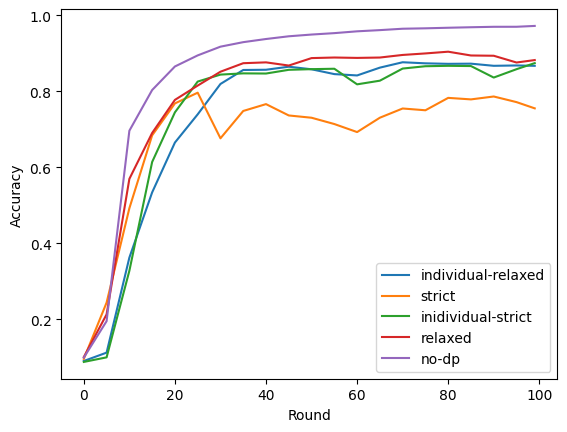

In [8]:
acc_df = pd.DataFrame({
    k: v["sparse_categorical_accuracy"]
    for k, v in dfs.items()
})
acc_df.plot(ylabel="Accuracy")

<Axes: xlabel='Round', ylabel='Loss'>

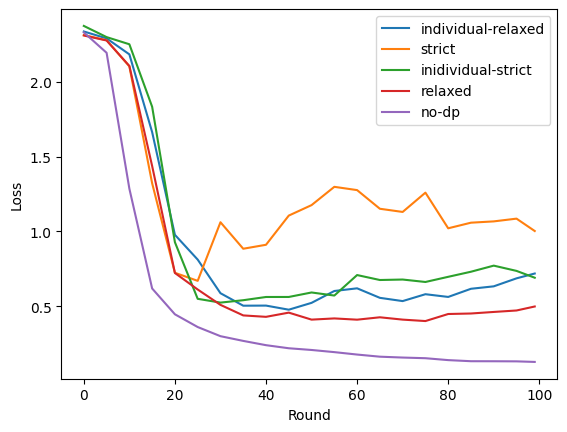

In [9]:
loss_df = pd.DataFrame({
    k: v["loss"]
    for k, v in dfs.items()
})
loss_df.plot(ylabel="Loss")